# Titanic Project

Problem Statement:
 
The Titanic Problem is based on the sinking of the ‘Unsinkable’ ship Titanic in early 1912. It gives you information about multiple people like their ages, sexes, sibling counts, embarkment points, and whether or not they survived the disaster. Based on these features, you have to predict if an arbitrary passenger on Titanic would survive the sinking or not. 


In [1]:
# Importing necessary Library's
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

In [2]:
#loading the data-set
df = pd.read_csv('titanic.csv')

In [3]:
#A sneak peak into the data set
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# Exploratory Data Analysis

In [4]:
#information about the variable names,their count and type.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


This show that Name, Sex, Ticket, Cabin and Enmbarked ae the string data rest all variables contain neumerical data  

In [5]:
df.describe(include='all')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Braund, Mr. Owen Harris",male,NaN,NaN,NaN,347082,NaN,B96 B98,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


This analysis shows that survived is categorical in nature with two values 0 and 1, allthe names ae unique

In [6]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

This shows that there are missing values in Age, Cabin and Embarked variables. The missing values in Age and Embarked variable  to be taken care and cabin variable can be droped as it is highly incomplete.

<AxesSubplot:xlabel='Sex', ylabel='Survived'>

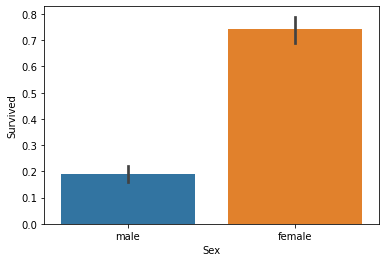

In [7]:
sns.barplot(x="Sex", y="Survived", data=df)

<AxesSubplot:xlabel='Pclass', ylabel='Survived'>

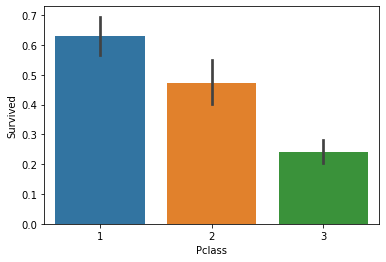

In [8]:
sns.barplot(x="Pclass", y="Survived", data=df)

<AxesSubplot:xlabel='SibSp', ylabel='Survived'>

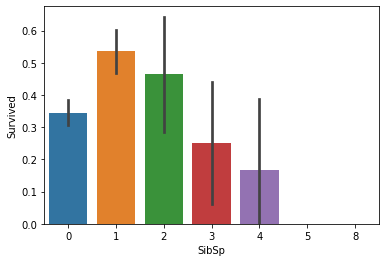

In [9]:
sns.barplot(x="SibSp", y="Survived", data=df)

The above three plots shows that there are more female survivors than male. More number of passengers survived belongs to class 1 and people with '0 to 2' siblings and spouse survived in more numbers.

In [10]:
# Droping the columns which are of least importance
df = df.drop(columns=['PassengerId','Name','Ticket',], axis=1)

In [11]:
df=df.drop(columns=['Cabin'], axis=1)

In [12]:
# Filling the missing values in Age variable wisth mean as this a neumerical value
df['Age'].fillna(df['Age'].mean(), inplace=True)

In [13]:
# Replacing the string categories with the neumerical categorical values
df.replace({'Sex':{'male':0,'female':1}, 'Embarked':{'S':0,'C':1,'Q':2}}, inplace=True)

In [14]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,0,22.0,1,0,7.2500,0.0
1,1,1,1,38.0,1,0,71.2833,1.0
2,1,3,1,26.0,0,0,7.9250,0.0
3,1,1,1,35.0,1,0,53.1000,0.0
4,0,3,0,35.0,0,0,8.0500,0.0


In [15]:
df['Embarked'].fillna(df['Embarked'].median(), inplace=True)

In [16]:
# Checking the null values one again
df.isnull().sum()
# Now there are no null values

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    int64  
 3   Age       891 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  891 non-null    float64
dtypes: float64(3), int64(5)
memory usage: 55.8 KB


In [18]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,0,22.0,1,0,7.2500,0.0
1,1,1,1,38.0,1,0,71.2833,1.0
2,1,3,1,26.0,0,0,7.9250,0.0
3,1,1,1,35.0,1,0,53.1000,0.0
4,0,3,0,35.0,0,0,8.0500,0.0


In [19]:
# Converting the Age and Fare variables ---- Float into int 
df['Age']=df['Age'].astype(int)
df['Fare']=df['Fare'].astype(int)

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    int64  
 3   Age       891 non-null    int32  
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    int32  
 7   Embarked  891 non-null    float64
dtypes: float64(1), int32(2), int64(5)
memory usage: 48.9 KB


In [21]:
# Seperating the training and testing data sets.
x = df.drop(columns = 'Survived', axis=1)
y = df['Survived']

In [22]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=42)

In [23]:
# Applying the Model
model = LogisticRegression()

In [24]:
model.fit(x_train, y_train)

LogisticRegression()

In [25]:
x_train_prediction = model.predict(x_train)

In [26]:
training_data_accuracy = accuracy_score(y_train, x_train_prediction)
print('Accuracy score of training data : ', training_data_accuracy)

Accuracy score of training data :  0.8019662921348315


In [27]:
x_test_prediction = model.predict(x_test)
test_data_accuracy = accuracy_score(y_test, x_test_prediction)
print('Accuracy score of test data : ', test_data_accuracy)

Accuracy score of test data :  0.7988826815642458


The accuracy score of training and test data are almost equal that means the model is a right fit

Testing the Model on a hypothetical data and this data does not include the survival data as it is to be determined by the model itself.

In [28]:
input_data = (3,0,35,0,0,8.05,0)  

In [29]:
input_data_as_numpy_array = np.asarray(input_data)

In [30]:
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

In [31]:
prediction = model.predict(input_data_reshaped)
#print(prediction)
if prediction[0]==0:
    print("Dead")
if prediction[0]==1:
    print("Alive")

Dead


In [32]:
# Saving the Model

import joblib

#save the model as pickle in file

joblib.dump(model,'Titanic_Survival_Prediction.pkl')

['Titanic_Survival_Prediction.pkl']